### Predictive Modeling

In [268]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline

In [258]:
df = pd.read_json("ultimate_data_challenge.json")
df.head(25)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [259]:
df.signup_date = pd.to_datetime(df.signup_date, format='%Y-%m-%d', errors='coerce')
df.last_trip_date = pd.to_datetime(df.last_trip_date, format='%Y-%m-%d', errors='coerce')

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

#### Let's change the phone number from an object to a number 1 for having a phone 0 for no phone.
#### Convert Ultimate_black_user from bool to 0 and 1
####  Encode the city
####  Date fields?  Add a column to reflect active clients.... active last_trip_date in the last 30 days.  So maybe multiple columns - active_Feb, active Mar, active April, Active May, active_June.

#### How many new clients in each month through June?


In [261]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

### How many new clients in each month through June?

In [133]:
type(usersbymonth)

pandas.core.frame.DataFrame

                count
last_trip_date       
1               10147
2                4308
3                4568
4                4588
5                7585
6               18256
7                 548
Total users: count    50000
dtype: int64
count
last_trip_date


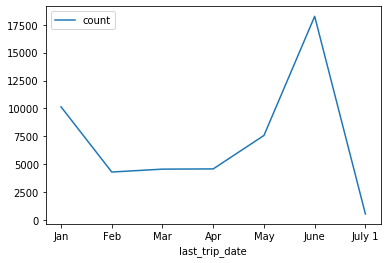

In [150]:
signups = df.signup_date.max()
#df.groupby([df['signup_date'].dt.year.rename('year'), df['signup_date'].dt.month.rename('month')]).agg({'count'})
#df['signup_date'].groupby(df['signup_date'].dt.year, df['signup_date'].dt.month).agg('count')
#df.set_index('signup_date').resample('M').size()#
signups

# WOW all clients were signed up in January.  I wasted a lot of time figuring that out.

usersbymonth = df['last_trip_date'].groupby([df.last_trip_date.dt.month]).agg({'count'})
#usersbymonth.reset_index(level=0, inplace=True)
print(usersbymonth)
print("Total users:",usersbymonth.sum())
usersbymonth['last_trip_date'] =['Jan','Feb','Mar','Apr','May','June','July 1']

for col in usersbymonth.columns:
    print(col)

usersbymonth.plot(x='last_trip_date',y='count')

In [12]:
import seaborn as sns
df.describe()


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


#### Check out the Max on Trips in first 30, surge_pct, and avg_dist...  ( do some scatters or freq plots )

#### What date do we need to consider active from?


In [36]:
print(max(df.last_trip_date))


2014-07-01


(array([1.5390e+04, 1.4108e+04, 7.4020e+03, 3.7880e+03, 2.5620e+03,
        1.6160e+03, 1.1340e+03, 8.1900e+02, 5.8900e+02, 4.7100e+02,
        3.4900e+02, 3.0100e+02, 2.2100e+02, 1.6800e+02, 1.4700e+02,
        1.5500e+02, 1.0800e+02, 1.1300e+02, 8.0000e+01, 6.9000e+01,
        5.1000e+01, 4.0000e+01, 3.4000e+01, 4.5000e+01, 3.3000e+01,
        2.0000e+01, 1.9000e+01, 2.8000e+01, 2.1000e+01, 9.0000e+00,
        1.5000e+01, 6.0000e+00, 8.0000e+00, 9.0000e+00, 1.1000e+01,
        2.0000e+00, 3.0000e+00, 9.0000e+00, 4.0000e+00, 3.0000e+00,
        5.0000e+00, 1.0000e+00, 3.0000e+00, 4.0000e+00, 5.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.00

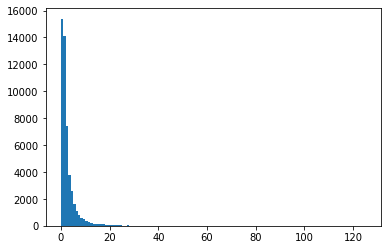

In [39]:
plt.hist([df.trips_in_first_30_days], bins=125)

##### Something is not normally distributed.  Logarithmic...

In [50]:
moreThan40 = df['trips_in_first_30_days']>73
TotalMoreThan40 = np.count_nonzero(moreThan40)
TotalMoreThan40

1

(array([  263.,   338.,  1504.,  6298., 33475.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

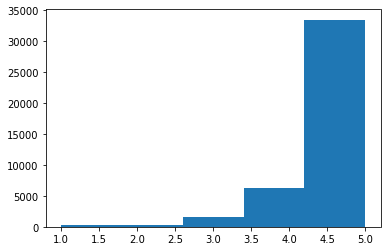

In [52]:
plt.hist([df.avg_rating_of_driver], bins=5)

(array([  185.,   158.,   661.,  2604., 46191.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

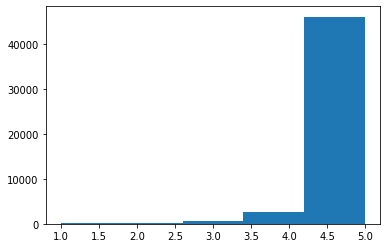

In [53]:
plt.hist([df.avg_rating_by_driver], bins=5)

In [297]:
nonactive_users=df[df['last_trip_date']<'2014-06-02'].count()
active_users = df[df['last_trip_date']>'2014-06-01'].count()
print('ACtive Users = ', active_users, ' \n\n and inactive users: ', nonactive_users)

print('ACTIVE USER PERCENTAGE : ', active_users['signup_date'] / (active_users['signup_date'] + nonactive_users['signup_date'])*100)
retain = {'Yes':active_users['city'], 'No':nonactive_users['city']}

print(retain)

ACtive Users =  trips_in_first_30_days       18310
signup_date                  18310
avg_rating_of_driver         18310
avg_surge                    18310
last_trip_date               18310
surge_pct                    18310
weekday_pct                  18310
avg_dist                     18310
avg_rating_by_driver         18276
active                       18310
ultimate_black_user_False    18310
ultimate_black_user_True     18310
city__Astapor                18310
city__King's Landing         18310
city__Winterfell             18310
phone__Android               18310
phone__iPhone                18310
dtype: int64  

 and inactive users:  trips_in_first_30_days       31690
signup_date                  31690
avg_rating_of_driver         31690
avg_surge                    31690
last_trip_date               31690
surge_pct                    31690
weekday_pct                  31690
avg_dist                     31690
avg_rating_by_driver         31523
active                       31690
u

KeyError: 'city'

<BarContainer object of 2 artists>

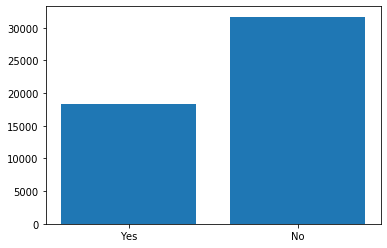

In [67]:
keys = retain.keys()
value = retain.values()

plt.bar(keys, value)

#### Encoding columns
 the Phone and City and Ultimate-Black columns. 

In [296]:
df = pd.get_dummies(df, prefix='phone_', columns=['phone'])
print(df.head())

   trips_in_first_30_days signup_date  avg_rating_of_driver  avg_surge  \
0                       4  2014-01-25                   4.7       1.10   
1                       0  2014-01-29                   5.0       1.00   
2                       3  2014-01-06                   4.3       1.00   
3                       9  2014-01-10                   4.6       1.14   
4                      14  2014-01-27                   4.4       1.19   

  last_trip_date  surge_pct  weekday_pct  avg_dist  avg_rating_by_driver  \
0     2014-06-17       15.4         46.2      3.67                   5.0   
1     2014-05-05        0.0         50.0      8.26                   5.0   
2     2014-01-07        0.0        100.0      0.77                   5.0   
3     2014-06-29       20.0         80.0      2.36                   4.9   
4     2014-03-15       11.8         82.4      3.13                   4.9   

   active  ultimate_black_user_False  ultimate_black_user_True  city__Astapor  \
0       1        

In [295]:
df = pd.get_dummies(df, prefix='city_', columns=['city'])
print(df.head())

   trips_in_first_30_days signup_date  avg_rating_of_driver  avg_surge  \
0                       4  2014-01-25                   4.7       1.10   
1                       0  2014-01-29                   5.0       1.00   
2                       3  2014-01-06                   4.3       1.00   
3                       9  2014-01-10                   4.6       1.14   
4                      14  2014-01-27                   4.4       1.19   

  last_trip_date    phone  surge_pct  weekday_pct  avg_dist  \
0     2014-06-17   iPhone       15.4         46.2      3.67   
1     2014-05-05  Android        0.0         50.0      8.26   
2     2014-01-07   iPhone        0.0        100.0      0.77   
3     2014-06-29   iPhone       20.0         80.0      2.36   
4     2014-03-15  Android       11.8         82.4      3.13   

   avg_rating_by_driver  active  ultimate_black_user_False  \
0                   5.0       1                          0   
1                   5.0       0                     

In [294]:
df = pd.get_dummies(df, prefix='ultimate_black_user', columns=['ultimate_black_user'])
print(df.head())

             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  weekday_pct  avg_dist  \
0       1.10     2014-06-17   iPhone       15.4         46.2      3.67   
1       1.00     2014-05-05  Android        0.0         50.0      8.26   
2       1.00     2014-01-07   iPhone        0.0        100.0      0.77   
3       1.14     2014-06-29   iPhone       20.0         80.0      2.36   
4       1.19     2014-03-15  Android       11.8         82.4      3.13   

   avg_rating_by_driver  active  ultimate_black_user_False  \
0                 

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [270]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


#### Change the Last_trip_date to binary (active/inactive)
Let's make a change in the last_trip_date to encode them to either active (30 days or less) and inactive (31 days or more).

In [290]:
days = dt.datetime(2014, 6, 1)
thirtydays = np.datetime64(days)
print(thirtydays)
        
df['active'] =[0 if thirtydays >= t else 1 for t in df['last_trip_date']]

2014-06-01T00:00:00.000000


In [291]:
df.head(10)


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,1
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,0


#### Fix the NaNs in the driver ratings - avg rating for all of the Nans

In [331]:

df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)

df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,ultimate_black_user_False,ultimate_black_user_True,city__Astapor,city__King's Landing,city__Winterfell,phone__Android,phone__iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,1,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,1,0,0,0,1,1,0


In [320]:
pd.set_option('precision', 2)
df.avg_rating_of_driver.astype('uint8')
df.avg_surge.astype('uint8')
df.surge_pct.astype('float32')
df.weekday_pct.astype('float32')
df.avg_dist.astype('float32')
df.avg_rating_by_driver.astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   trips_in_first_30_days     50000 non-null  int64         
 1   signup_date                50000 non-null  datetime64[ns]
 2   avg_rating_of_driver       50000 non-null  float64       
 3   avg_surge                  50000 non-null  float64       
 4   last_trip_date             50000 non-null  datetime64[ns]
 5   surge_pct                  50000 non-null  float64       
 6   weekday_pct                50000 non-null  float64       
 7   avg_dist                   50000 non-null  float64       
 8   avg_rating_by_driver       49799 non-null  float64       
 9   active                     50000 non-null  int64         
 10  ultimate_black_user_False  50000 non-null  uint8         
 11  ultimate_black_user_True   50000 non-null  uint8         
 12  city

In [292]:
df.to_csv('predict_retention.csv')


In [332]:
col_mask = df.isnull().any(axis=0)
row_mask = df.isnull().any(axis=1)

df.loc[row_mask,col_mask]

""


In [340]:
#Calculate the correlation coefficients
corr = df.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,ultimate_black_user_False,ultimate_black_user_True,city__Astapor,city__King's Landing,city__Winterfell,phone__Android,phone__iPhone
trips_in_first_30_days,1.00,-0.01,-0.00,0.01,0.05,-0.14,-0.04,0.21,-0.11,0.11,-0.06,0.02,0.04,-0.06,0.06
avg_rating_of_driver,-0.01,1.00,-0.02,-0.00,0.01,0.03,0.10,-0.01,0.00,-0.00,0.03,0.08,-0.09,0.02,-0.02
avg_surge,-0.00,-0.02,1.00,0.79,-0.11,-0.08,0.01,-0.00,0.08,-0.08,0.04,-0.01,-0.03,-0.01,0.01
surge_pct,0.01,-0.00,0.79,1.00,-0.14,-0.10,0.02,0.01,0.11,-0.11,0.05,0.03,-0.07,-0.01,0.01
weekday_pct,0.05,0.01,-0.11,-0.14,1.00,0.10,0.02,0.03,-0.04,0.04,-0.01,0.03,-0.02,-0.01,0.01
avg_dist,-0.14,0.03,-0.08,-0.10,0.10,1.00,0.08,-0.09,-0.03,0.03,-0.05,0.02,0.03,0.02,-0.03
avg_rating_by_driver,-0.04,0.10,0.01,0.02,0.02,0.08,1.00,-0.03,-0.01,0.01,0.03,0.08,-0.10,0.01,-0.01
active,0.21,-0.01,-0.00,0.01,0.03,-0.09,-0.03,1.00,-0.21,0.21,-0.18,0.27,-0.05,-0.23,0.23
ultimate_black_user_False,-0.11,0.00,0.08,0.11,-0.04,-0.03,-0.01,-0.21,1.00,-1.00,-0.02,-0.04,0.05,0.08,-0.07
ultimate_black_user_True,0.11,-0.00,-0.08,-0.11,0.04,0.03,0.01,0.21,-1.00,1.00,0.02,0.04,-0.05,-0.08,0.07


In [300]:
#### setup model for decision tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [341]:
x = df.drop(['active', 'signup_date', 'last_trip_date', 'avg_surge'], axis = 1)
y = df.active

In [342]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [343]:
dcm = DecisionTreeClassifier()
dcm.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [344]:
y_pred = dcm.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [345]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy = ",accuracy)
print("Precision = ", precision)
print("Recall = ", recall)

Accuracy =  0.7024666666666667
Precision =  0.591648590021692
Recall =  0.5975899214898667


Results:

1. 36.6% retainment rate
    Inserted Mean ratings in the by Driver and of Driver ratings.
    Encoded the city, phone, ultimate_black_user program 
    Checked out distributions of various fields and nothing is normally distributed but logarithmic
    No strong correlations except for inversely related like avg_surge percent_surge, phone_android and phone_apple
2. I decided on a simple decision tree analysis.  There is little correlation between the variables and utilizing the decision tree process might squeeze out some options.  The initial predictive results range from 59% to 70%.  Recall and Precision are around 60% correct while the overall Accuracy is 70%.  Doing some enhanced decision trees should improve those results some, however, there are probably better alternatives
3. The insight found in this data would be to try to collect a bit more information through the Ultimate_Black program and incentivize program participation and poll riders for reasons for using the service.